In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import numpy as np
import os
from datetime import datetime
from matplotlib import patheffects
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

In [28]:
TEMPLATE_PATH = os.path.abspath(os.path.join(os.getcwd(), "..", "..", "_templates"))

In [29]:
# Daten einlesen
wahlen_df = pd.read_pickle(os.path.join(TEMPLATE_PATH, "wahlen.pickle"))
wordcount_df = pd.read_pickle(os.path.join(TEMPLATE_PATH, "wordcount.pickle"))

In [30]:
# Liste der Parteifarben
parteifarben = {'cdu': 'black', 'spd': 'red', 'grüne': 'green','grünen': 'green',
                'fdp': '#DAA520', 'linke': 'purple', 'afd': 'blue'}

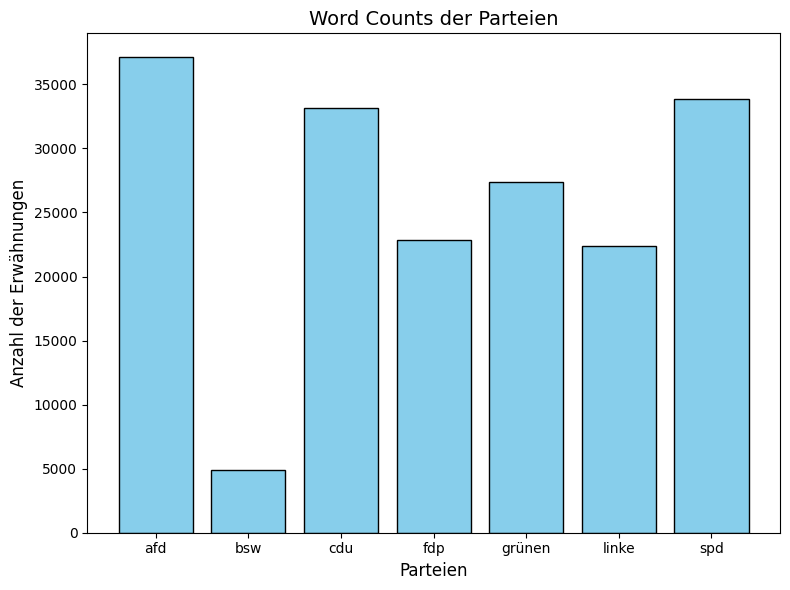

In [31]:
import matplotlib.pyplot as plt

# Daten vorbereiten
words = ["afd", "bsw", "cdu", "fdp", "grünen", "linke", "spd"]
counts = [37128, 4873, 33175, 22829, 27395, 22414, 33849]

# Barplot erstellen
plt.figure(figsize=(8, 6))
plt.bar(words, counts, color="skyblue", edgecolor="black")
plt.title("Word Counts der Parteien", fontsize=14)
plt.xlabel("Parteien", fontsize=12)
plt.ylabel("Anzahl der Erwähnungen", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Plot anzeigen
plt.show()


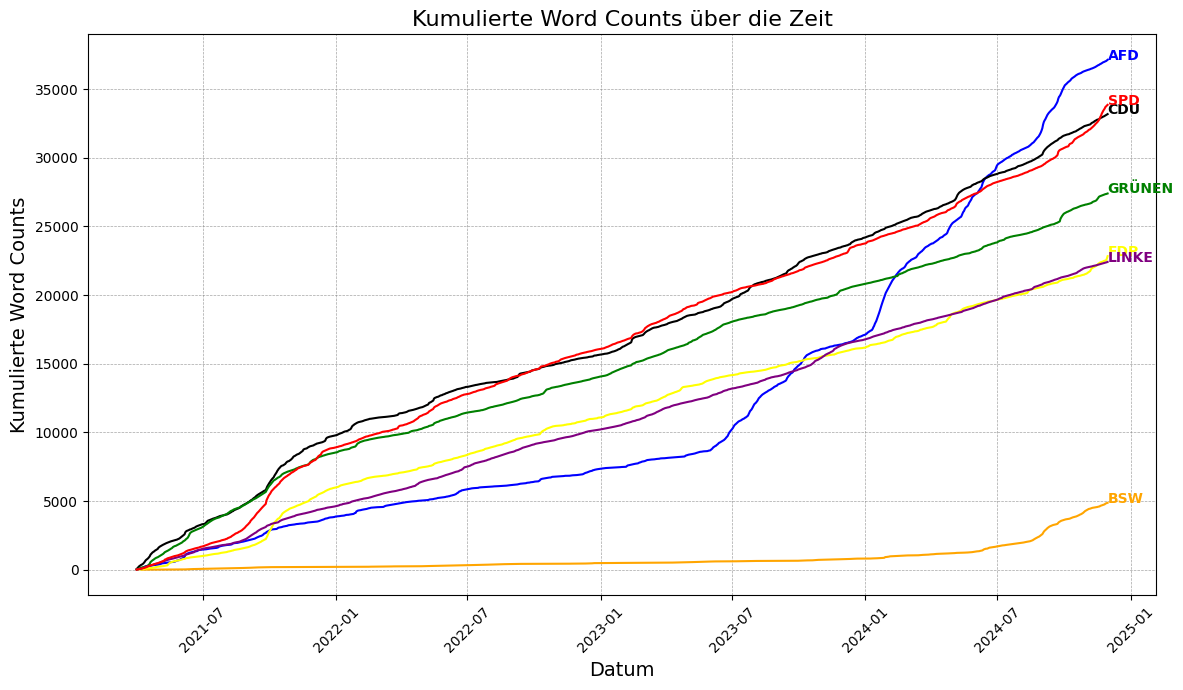

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Datum in ein datetime-Format umwandeln
wordcount_df["date"] = pd.to_datetime(wordcount_df["date"])

# Farben pro Partei definieren
party_colors = {
    "cdu": "black",
    "grünen": "green",
    "spd": "red",
    "fdp": "yellow",
    "linke": "purple",
    "afd": "blue",
    "bsw": "orange"
}

# Kumulierten Wordcount pro Partei berechnen
cumulative_data = wordcount_df.groupby(["word", "date"])["count"].sum().groupby(level=0).cumsum().reset_index()

# Plot erstellen
plt.figure(figsize=(12, 7))
for word, group in cumulative_data.groupby("word"):
    plt.plot(
        group["date"], 
        group["count"], 
        label=word.upper(), 
        color=party_colors.get(word, "gray"), 
        linewidth=1.5
    )
    # Parteiname am Ende der Linie anzeigen
    plt.text(
        group["date"].iloc[-1],  # Letztes Datum
        group["count"].iloc[-1],  # Letzter Wert
        word.upper(),  # Parteiname
        color=party_colors.get(word, "gray"),
        fontsize=10,
        fontweight="bold"
    )

# Titel und Achsenbeschriftungen
plt.title("Kumulierte Word Counts über die Zeit", fontsize=16)
plt.xlabel("Datum", fontsize=14)
plt.ylabel("Kumulierte Word Counts", fontsize=14)

# Achsenformatierung
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y-%m"))
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Rasterlinien hinzufügen
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

# Layout anpassen und Plot anzeigen
plt.tight_layout()
plt.show()


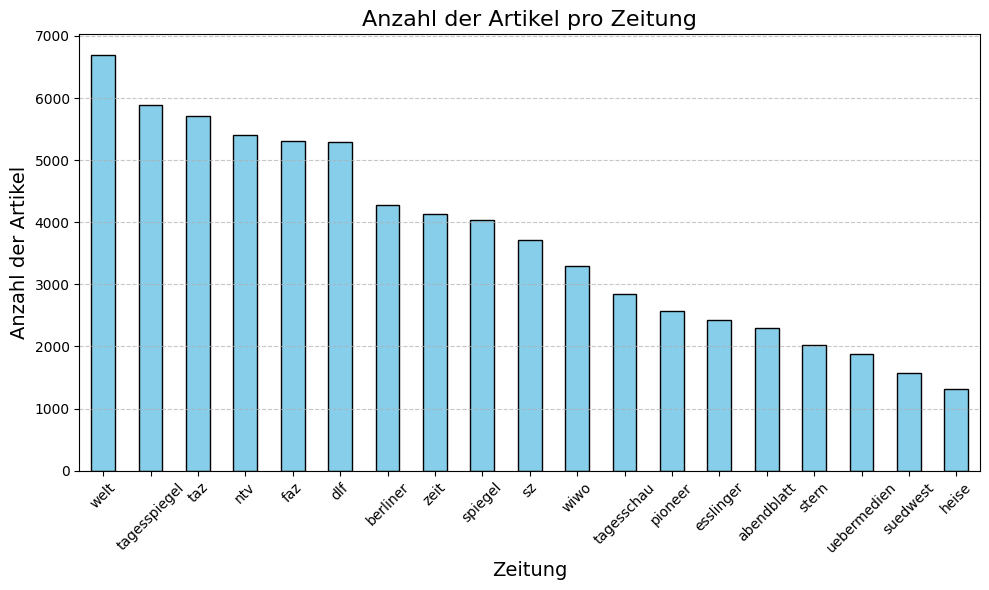

In [33]:
# Verteilung der Artikel pro Zeitung
paper_counts = wordcount_df["paper"].value_counts()

# Barplot erstellen
plt.figure(figsize=(10, 6))
paper_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Anzahl der Artikel pro Zeitung", fontsize=16)
plt.xlabel("Zeitung", fontsize=14)
plt.ylabel("Anzahl der Artikel", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


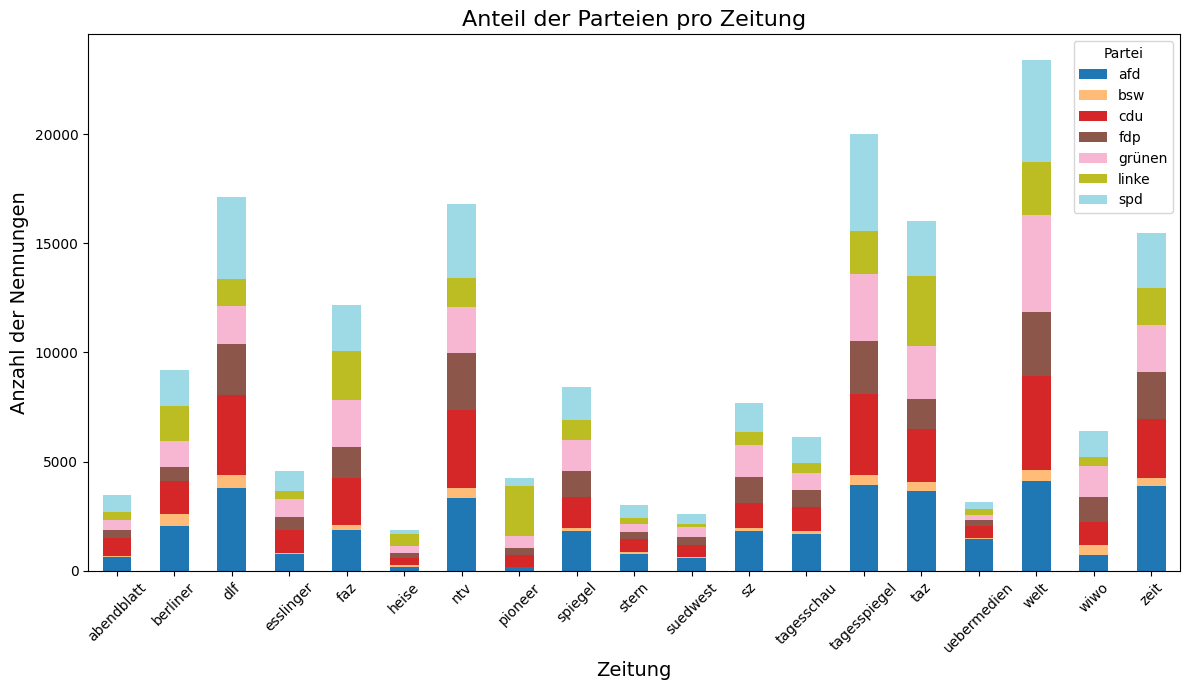

In [34]:
# Gruppieren nach Zeitung und Partei
party_paper_distribution = wordcount_df.groupby(["paper", "word"])["count"].sum().unstack(fill_value=0)

# Gestapelter Barplot
party_paper_distribution.plot(kind="bar", stacked=True, figsize=(12, 7), colormap="tab20")
plt.title("Anteil der Parteien pro Zeitung", fontsize=16)
plt.xlabel("Zeitung", fontsize=14)
plt.ylabel("Anzahl der Nennungen", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Partei", fontsize=10)
plt.tight_layout()
plt.show()


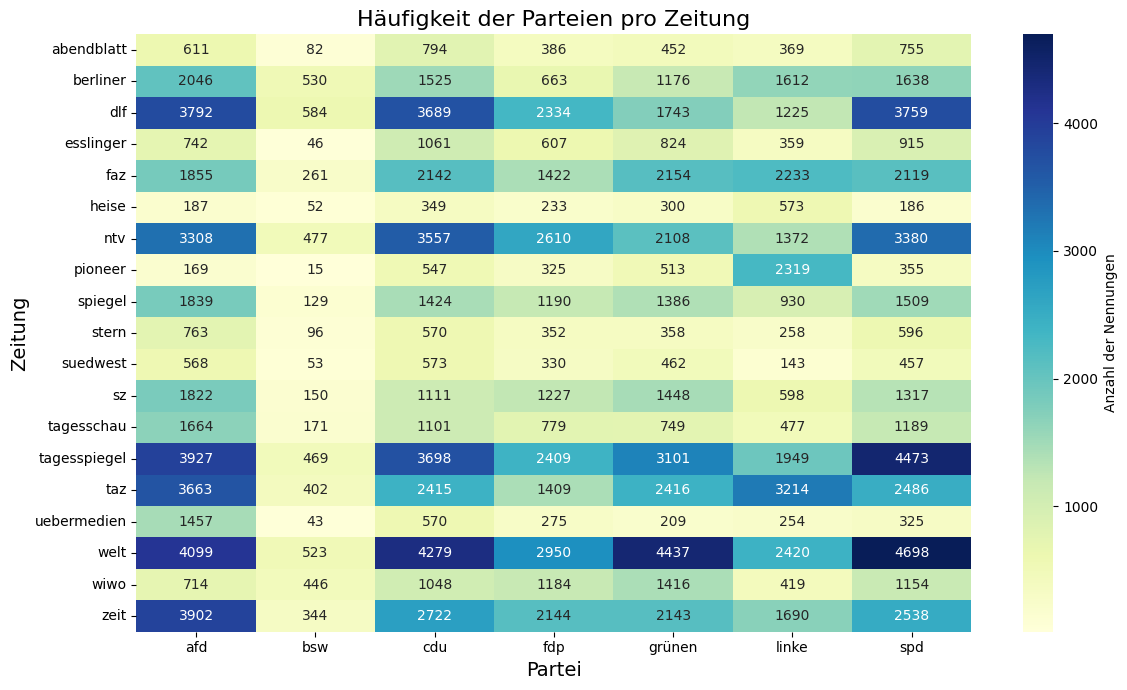

In [35]:
import seaborn as sns

# Gruppieren nach Zeitung und Partei
heatmap_data = wordcount_df.groupby(["paper", "word"])["count"].sum().unstack(fill_value=0)

# Heatmap erstellen
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", cbar_kws={"label": "Anzahl der Nennungen"})
plt.title("Häufigkeit der Parteien pro Zeitung", fontsize=16)
plt.xlabel("Partei", fontsize=14)
plt.ylabel("Zeitung", fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_9816\332654521.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024["week"] = data_2024["date"].dt.to_period("W")


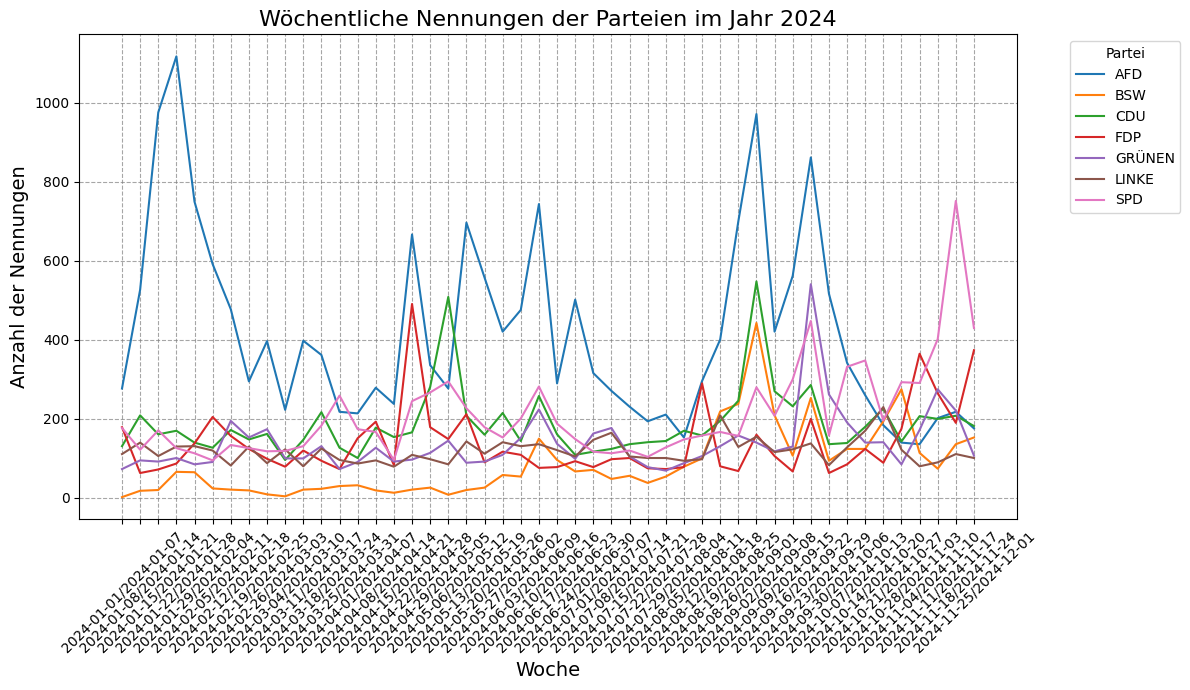

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtere die Daten für das Jahr 2024
data_2024 = wordcount_df[wordcount_df["date"].dt.year == 2024]

# Gruppiere die Daten nach Wochen und Partei
data_2024["week"] = data_2024["date"].dt.to_period("W")
party_trends_weekly = data_2024.groupby(["week", "word"])["count"].sum().unstack(fill_value=0)

# Plot erstellen
plt.figure(figsize=(12, 7))
for party in party_trends_weekly.columns:
    plt.plot(
        party_trends_weekly.index.to_timestamp(), 
        party_trends_weekly[party], 
        label=party.upper()
    )

# Titel und Achsenbeschriftungen
plt.title("Wöchentliche Nennungen der Parteien im Jahr 2024", fontsize=16)
plt.xlabel("Woche", fontsize=14)
plt.ylabel("Anzahl der Nennungen", fontsize=14)
plt.legend(title="Partei", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(party_trends_weekly.index.to_timestamp(), labels=party_trends_weekly.index, rotation=45)
plt.grid(color="gray", linestyle="--", alpha=0.7)

# Layout optimieren
plt.tight_layout()
plt.show()


In [37]:
# Gesamtsumme der Nennungen wordcount_dfr Parteien
total_words = wordcount_df["count"].sum()

# Prozentanteil für jede Partei berechnen
party_percentages = (
    wordcount_df.groupby("word")["count"].sum() / total_words * 100
).sort_values(ascending=False)

# Ergebnisse anzeigen
for party, percentage in party_percentages.items():
    print(f"Prozentanteil von '{party}': {percentage:.2f}%")


Prozentanteil von 'afd': 20.44%
Prozentanteil von 'spd': 18.63%
Prozentanteil von 'cdu': 18.26%
Prozentanteil von 'grünen': 15.08%
Prozentanteil von 'fdp': 12.57%
Prozentanteil von 'linke': 12.34%
Prozentanteil von 'bsw': 2.68%


In [38]:
# Gruppieren nach Zeitung und Partei, dann aufsummieren
portal_party_counts = wordcount_df.groupby(["paper", "word"])["count"].sum()

# Für jede Partei das Portal mit den höchsten Nennungen finden
top_portal_per_party = portal_party_counts.groupby("word").idxmax()

# Ergebnisse extrahieren
for party, (paper, _) in top_portal_per_party.items():
    print(f"Die meisten Berichte über '{party}' kommen von '{paper}' mit {portal_party_counts[paper, party]} Nennungen.")


Die meisten Berichte über 'afd' kommen von 'welt' mit 4099 Nennungen.
Die meisten Berichte über 'bsw' kommen von 'dlf' mit 584 Nennungen.
Die meisten Berichte über 'cdu' kommen von 'welt' mit 4279 Nennungen.
Die meisten Berichte über 'fdp' kommen von 'welt' mit 2950 Nennungen.
Die meisten Berichte über 'grünen' kommen von 'welt' mit 4437 Nennungen.
Die meisten Berichte über 'linke' kommen von 'taz' mit 3214 Nennungen.
Die meisten Berichte über 'spd' kommen von 'welt' mit 4698 Nennungen.


In [39]:
# Gesamtnennungen pro Zeitung
total_counts_per_paper = wordcount_df.groupby("paper")["count"].sum()

# Gruppieren nach Zeitung und Partei, dann Summen berechnen
portal_party_counts = wordcount_df.groupby(["paper", "word"])["count"].sum()

# Prozentualen Anteil jeder Partei pro Zeitung berechnen
portal_party_percentages = portal_party_counts.div(total_counts_per_paper, level=0) * 100

# Ergebnisse anzeigen
for (paper, party), percentage in portal_party_percentages.items():
    print(f"{paper} berichtet zu {percentage:.2f}% über '{party}'.")


abendblatt berichtet zu 17.72% über 'afd'.
abendblatt berichtet zu 2.38% über 'bsw'.
abendblatt berichtet zu 23.02% über 'cdu'.
abendblatt berichtet zu 11.19% über 'fdp'.
abendblatt berichtet zu 13.11% über 'grünen'.
abendblatt berichtet zu 10.70% über 'linke'.
abendblatt berichtet zu 21.89% über 'spd'.
berliner berichtet zu 22.26% über 'afd'.
berliner berichtet zu 5.77% über 'bsw'.
berliner berichtet zu 16.59% über 'cdu'.
berliner berichtet zu 7.21% über 'fdp'.
berliner berichtet zu 12.80% über 'grünen'.
berliner berichtet zu 17.54% über 'linke'.
berliner berichtet zu 17.82% über 'spd'.
dlf berichtet zu 22.14% über 'afd'.
dlf berichtet zu 3.41% über 'bsw'.
dlf berichtet zu 21.54% über 'cdu'.
dlf berichtet zu 13.63% über 'fdp'.
dlf berichtet zu 10.18% über 'grünen'.
dlf berichtet zu 7.15% über 'linke'.
dlf berichtet zu 21.95% über 'spd'.
esslinger berichtet zu 16.29% über 'afd'.
esslinger berichtet zu 1.01% über 'bsw'.
esslinger berichtet zu 23.30% über 'cdu'.
esslinger berichtet zu 13

In [40]:
# In ein DataFrame umwandeln
portal_party_percentages_df = portal_party_percentages.unstack().fillna(0)

# Tabellarische Anzeige
print(portal_party_percentages_df)


word                afd       bsw        cdu        fdp     grünen      linke  \
paper                                                                           
abendblatt    17.715280  2.377501  23.021166  11.191650  13.105248  10.698753   
berliner      22.263330  5.767138  16.594124   7.214363  12.796518  17.540805   
dlf           22.141773  3.410020  21.540348  13.628401  10.177508   7.152867   
esslinger     16.293368  1.010101  23.298199  13.328942  18.093983   7.883180   
faz           15.222386  2.141802  17.577548  11.669129  17.676022  18.324307   
heise          9.946809  2.765957  18.563830  12.393617  15.957447  30.478723   
ntv           19.676422  2.837259  21.157507  15.524625  12.538663   8.160837   
pioneer        3.983031  0.353523  12.891822   7.659675  12.090502  54.654725   
spiegel       21.874628  1.534436  16.938266  14.154871  16.486261  11.062210   
stern         25.492817  3.207484  19.044437  11.760775  11.961243   8.620114   
suedwest      21.964424  2.0

In [41]:
# Series in ein DataFrame umwandeln
portal_party_percentages_df = portal_party_percentages.unstack()

# Durchschnittliche Berichterstattung pro Partei berechnen
average_party_coverage = portal_party_percentages_df.mean().sort_values(ascending=False)

# Ergebnisse anzeigen
print("Durchschnittliche Berichterstattung pro Partei:")
print(average_party_coverage)


Durchschnittliche Berichterstattung pro Partei:
word
afd       20.545790
cdu       18.382086
spd       17.494486
grünen    14.846232
linke     13.759099
fdp       12.347512
bsw        2.624795
dtype: float64


In [42]:
# Filtere die Daten für das Jahr 2024
data_2024 = wordcount_df[wordcount_df["date"].dt.year == 2024]

# Gesamtnennungen pro Zeitung im Jahr 2024
total_counts_per_paper_2024 = data_2024.groupby("paper")["count"].sum()

# Gruppieren nach Zeitung und Partei im Jahr 2024
portal_party_counts_2024 = data_2024.groupby(["paper", "word"])["count"].sum()

# Prozentualen Anteil jeder Partei pro Zeitung im Jahr 2024 berechnen
portal_party_percentages_2024 = portal_party_counts_2024.div(total_counts_per_paper_2024, level=0) * 100

# Series in ein DataFrame umwandeln
portal_party_percentages_2024_df = portal_party_percentages_2024.unstack()

# Durchschnittliche Berichterstattung pro Partei im Jahr 2024 berechnen
average_party_coverage_2024 = portal_party_percentages_2024_df.mean().sort_values(ascending=False)

# Ergebnisse anzeigen
print("Durchschnittliche Berichterstattung pro Partei im Jahr 2024:")
print(average_party_coverage_2024)


Durchschnittliche Berichterstattung pro Partei im Jahr 2024:
word
afd       32.099678
spd       15.356324
cdu       14.360711
linke     11.176606
fdp       10.702306
grünen    10.363510
bsw        5.940865
dtype: float64


In [43]:
print(portal_party_percentages_2024_df)


word                afd        bsw        cdu        fdp     grünen  \
paper                                                                 
abendblatt    29.105572   5.351906  15.762463  10.850440   9.677419   
berliner      35.879874  13.883035  12.565859   4.952582   9.457323   
dlf           33.758049   7.768187  15.919989  12.070147   7.562680   
esslinger     28.036606   2.246256  19.134775  10.565724  15.058236   
faz           23.998910   5.802234  14.873332  10.950695  13.538545   
heise         17.341040   4.624277  25.626204   9.248555   7.707129   
ntv           32.196237   6.840162  14.612274  13.996835   8.475470   
pioneer       14.421769   2.040816   7.482993  10.612245   5.714286   
spiegel       34.643644   4.518736  12.674504  10.947832  11.388685   
stern         36.106195   7.787611  14.424779   8.230088   7.876106   
suedwest      33.259669   5.524862  14.806630  11.270718  15.801105   
sz            46.474820   4.556355   9.640288   7.961631   9.928058   
tagess

In [44]:
# Filtere die Daten bis einschließlich 2024
data_until_2024 = wordcount_df[wordcount_df["date"].dt.year <= 2024]

# Gesamtnennungen pro Zeitung bis 2024
total_counts_per_paper_until_2024 = data_until_2024.groupby("paper")["count"].sum()

# Gruppieren nach Zeitung und Partei bis 2024
portal_party_counts_until_2024 = data_until_2024.groupby(["paper", "word"])["count"].sum()

# Prozentualen Anteil jeder Partei pro Zeitung bis 2024 berechnen
portal_party_percentages_until_2024 = portal_party_counts_until_2024.div(total_counts_per_paper_until_2024, level=0) * 100

# Series in ein DataFrame umwandeln
portal_party_percentages_until_2024_df = portal_party_percentages_until_2024.unstack()

# Durchschnittliche Berichterstattung pro Partei bis 2024 berechnen
average_party_coverage_until_2024 = portal_party_percentages_until_2024_df.mean().sort_values(ascending=False)

# Ergebnisse anzeigen
print("Durchschnittliche Berichterstattung pro Partei bis einschließlich 2024:")
print(average_party_coverage_until_2024)


Durchschnittliche Berichterstattung pro Partei bis einschließlich 2024:
word
afd       20.545790
cdu       18.382086
spd       17.494486
grünen    14.846232
linke     13.759099
fdp       12.347512
bsw        2.624795
dtype: float64


In [45]:
print(portal_party_percentages_until_2024_df)


word                afd       bsw        cdu        fdp     grünen      linke  \
paper                                                                           
abendblatt    17.715280  2.377501  23.021166  11.191650  13.105248  10.698753   
berliner      22.263330  5.767138  16.594124   7.214363  12.796518  17.540805   
dlf           22.141773  3.410020  21.540348  13.628401  10.177508   7.152867   
esslinger     16.293368  1.010101  23.298199  13.328942  18.093983   7.883180   
faz           15.222386  2.141802  17.577548  11.669129  17.676022  18.324307   
heise          9.946809  2.765957  18.563830  12.393617  15.957447  30.478723   
ntv           19.676422  2.837259  21.157507  15.524625  12.538663   8.160837   
pioneer        3.983031  0.353523  12.891822   7.659675  12.090502  54.654725   
spiegel       21.874628  1.534436  16.938266  14.154871  16.486261  11.062210   
stern         25.492817  3.207484  19.044437  11.760775  11.961243   8.620114   
suedwest      21.964424  2.0

In [46]:
data_before_2024 = wordcount_df[wordcount_df["date"].dt.year < 2024]
data_2024 = wordcount_df[wordcount_df["date"].dt.year == 2024]

wordcount_before_2024 = data_before_2024.groupby("word")["count"].sum()
wordcount_2024 = data_2024.groupby("word")["count"].sum()

total_before_2024 = wordcount_before_2024.sum()
total_2024 = wordcount_2024.sum()


percentage_before_2024 = (wordcount_before_2024 / total_before_2024 * 100).sort_values(ascending=False)
percentage_2024 = (wordcount_2024 / total_2024 * 100).sort_values(ascending=False)

percent_change = percentage_2024 - percentage_before_2024

print("Prozentuale Verteilung der Nennungen vor 2024:")
print(percentage_before_2024)

print("\nProzentuale Verteilung der Nennungen im Jahr 2024:")
print(percentage_2024)

print("\nProzentuale Veränderung der Nennungen von 2023 zu 2024:")
print(percent_change)

Prozentuale Verteilung der Nennungen vor 2024:
word
cdu       20.224287
spd       19.861347
grünen    17.406066
afd       14.301006
linke     14.017511
fdp       13.515751
bsw        0.674031
Name: count, dtype: float64

Prozentuale Verteilung der Nennungen im Jahr 2024:
word
afd       32.257909
spd       16.266671
cdu       14.481992
fdp       10.738677
grünen    10.600155
linke      9.103795
bsw        6.550802
Name: count, dtype: float64

Prozentuale Veränderung der Nennungen von 2023 zu 2024:
word
afd       17.956903
bsw        5.876771
cdu       -5.742295
fdp       -2.777074
grünen    -6.805912
linke     -4.913717
spd       -3.594676
Name: count, dtype: float64
